Функции потерь и оптимизация

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами

In [2]:
#загружаем данные
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [3]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
#В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica
iris = iris.loc[iris['variety'] != 'Setosa']
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
# проверяем на пустые данные или потери
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  100 non-null    float64
 1   sepal.width   100 non-null    float64
 2   petal.length  100 non-null    float64
 3   petal.width   100 non-null    float64
 4   variety       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [6]:
#готовим данные
iris['variety'] = iris['variety'].map({'Versicolor': 0, 'Virginica': 1})
y = np.array(iris['variety'])
X = np.array(iris.drop(['variety'], axis = 1))

C:\Users\yuril\AppData\Local\Temp\ipykernel_9384\1099680765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['variety'] = iris['variety'].map({'Versicolor': 0, 'Virginica': 1})


In [7]:
X[:10], y[:10]

(array([[7. , 3.2, 4.7, 1.4],
        [6.4, 3.2, 4.5, 1.5],
        [6.9, 3.1, 4.9, 1.5],
        [5.5, 2.3, 4. , 1.3],
        [6.5, 2.8, 4.6, 1.5],
        [5.7, 2.8, 4.5, 1.3],
        [6.3, 3.3, 4.7, 1.6],
        [4.9, 2.4, 3.3, 1. ],
        [6.6, 2.9, 4.6, 1.3],
        [5.2, 2.7, 3.9, 1.4]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

In [8]:
class LogR():
    def sigmoid(self, theta):
        return 1/(1 + np.exp(-theta))

    def theta(self, theta, X):
        return theta[0] + theta[1] * X[:, 0] + theta[2] * X[:, 1] + theta[3] * X[:, 2] + theta[4] * X[:, 3]
   
    # бинарная кросс энтропия (функция потерь)
    def cost_2(self, y, sigmoid):
        eps = 1e-6    
        cf = - np.mean(y * np.log(sigmoid + eps) + (1 - y + eps) * np.log(1 - sigmoid + eps))
        cf = np.sum(cf)
        return cf

    def predict(self, theta, X):
        return self.sigmoid(self.theta(theta, X))

    def cost_1(self, Y, sigmoid):
        return np.sum(np.square(sigmoid - Y)) / (2 * len(sigmoid))
         
    def predict_grad(self, X, Y, epochs, lr, theta):
        losses = []
        for _ in range(epochs):
            sigmoid = self.predict(theta, X)
            #loss = self.cost_1(Y, sigmoid)
            loss = self.cost_2(Y, sigmoid)
            losses.append(loss)
            theta[0] = theta[0] - lr * np.sum(sigmoid - Y) / len(sigmoid)
            theta[1] = theta[1] - lr * np.sum((sigmoid - Y) * X[:, 0])/len(sigmoid)
            theta[2] = theta[2] - lr * np.sum((sigmoid - Y) * X[:, 1])/len(sigmoid)
            theta[3] = theta[3] - lr * np.sum((sigmoid - Y) * X[:, 2])/len(sigmoid)
            theta[4] = theta[4] - lr * np.sum((sigmoid - Y) * X[:, 3])/len(sigmoid)
        return [theta, losses, self.errors(X, Y, theta)]

    def predict_rmsprop(self, X, Y, epochs, lr, epsilon, gamma, theta):
        # заполняем 0 
        grad = np.zeros(5)
        sq_grad = np.zeros(5)
        losses = []
        for _ in range(epochs):
            sigmoid = self.predict(theta, X)
            loss = self.cost_2(Y, sigmoid)
            losses.append(loss)
            grad[0] = np.sum(sigmoid - Y)/len(sigmoid)
            grad[1] = np.sum((sigmoid - Y) * X[:, 0])/len(sigmoid)
            grad[2] = np.sum((sigmoid - Y) * X[:, 1])/len(sigmoid)
            grad[3] = np.sum((sigmoid - Y) * X[:, 2])/len(sigmoid)
            grad[4] = np.sum((sigmoid - Y) * X[:, 3])/len(sigmoid)
            sq_grad = gamma * sq_grad + (1 - gamma)  * grad ** 2
            theta -= lr * grad / np.sqrt(sq_grad + epsilon)
        return [theta, losses, self.errors(X, Y, theta)]

    def predict_nadam(self, X, Y, epochs, lr, gamma, theta):
        # заполняем 0 
        vt = np.zeros(5)
        vt_prev = np.zeros(5)
        losses = []
        for _ in range(epochs):
            sigmoid = self.predict(theta, X)
            loss = self.cost_2(Y, sigmoid)
            losses.append(loss)
            sigmoid = self.predict(theta - gamma * vt_prev, X)
            vt[0] = (gamma * vt_prev[0] + lr * np.sum(sigmoid - Y))/len(sigmoid)
            vt[1] = (gamma * vt_prev[1] + lr * np.sum((sigmoid - Y) * X[:, 0]))/len(sigmoid)
            vt[2] = (gamma * vt_prev[2] + lr * np.sum((sigmoid - Y) * X[:, 1]))/len(sigmoid)
            vt[3] = (gamma * vt_prev[3] + lr * np.sum((sigmoid - Y) * X[:, 2]))/len(sigmoid)
            vt[4] = (gamma * vt_prev[4] + lr * np.sum((sigmoid - Y) * X[:, 3]))/len(sigmoid)
            theta -= vt
            vt_prev = vt
        return [theta, losses, self.errors(X, Y, theta)]

    def errors(self, X, Y, theta):
        count = 0
        for index, item in enumerate(np.around(self.predict(theta, X))):
            if int(item) != Y[index].item():
                count += 1
        return count

In [9]:
%%time
# присвоим первоначальные значения
theta = [1, 1, 1, 1, 1 ]
rg = LogR()
r =rg.predict_grad(X, y, 1000, 0.02, theta)


CPU times: total: 31.2 ms
Wall time: 84.1 ms


In [10]:
r[0], r[2]

([0.20755683479542816,
  -1.378675447136359,
  -0.6254951156300759,
  1.4694839338565107,
  1.868472608790738],
 5)

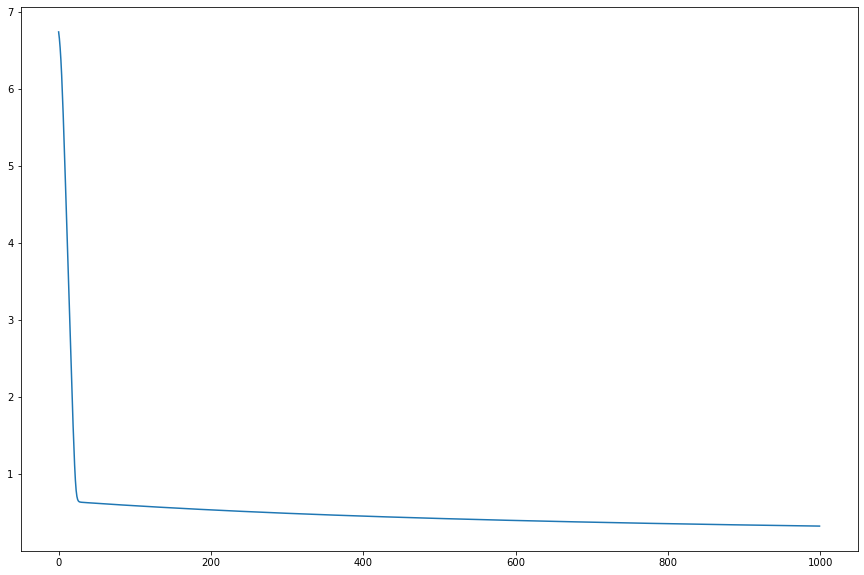

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(r[1])
plt.show()

In [12]:
%%time
#Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp)
theta = [1, 1, 1, 1, 1 ]
r = rg.predict_rmsprop(X, y, 1000, 0.02, 0.9999, 0.99999, theta)

CPU times: total: 46.9 ms
Wall time: 88.2 ms


In [13]:
r[0], r[2]

(array([ 0.20736912, -1.3780013 , -0.62564782,  1.46875602,  1.86846729]), 5)

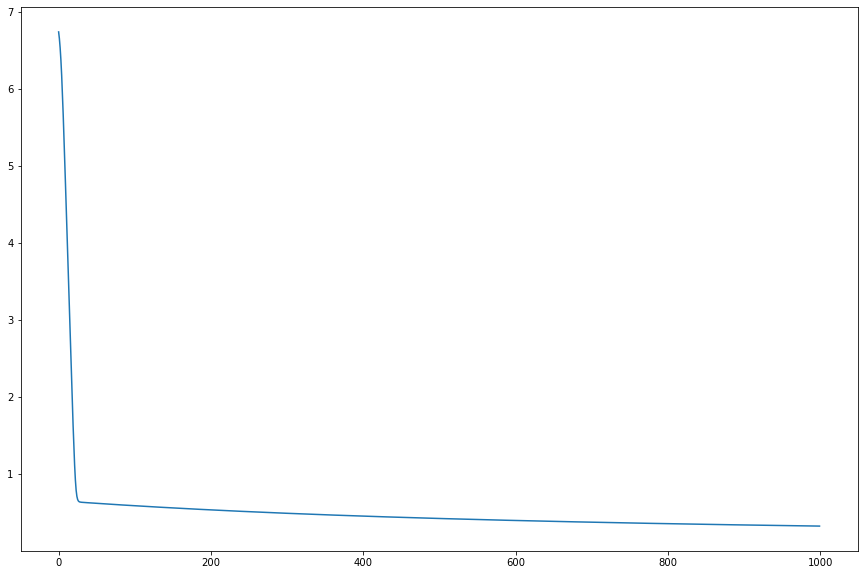

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(r[1])
plt.show()

In [15]:
%%time
#Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов 
#(Nesterov–accelerated Adaptive Moment Estimation, Nadam).
theta = [1, 1, 1, 1, 1 ]
r = rg.predict_nadam(X, y, 1000, 0.02, 0.9, theta)


CPU times: total: 31.2 ms
Wall time: 98.3 ms


In [16]:
r[0], r[2]

(array([ 0.2040515 , -1.38379327, -0.63122465,  1.47767656,  1.87542595]), 5)

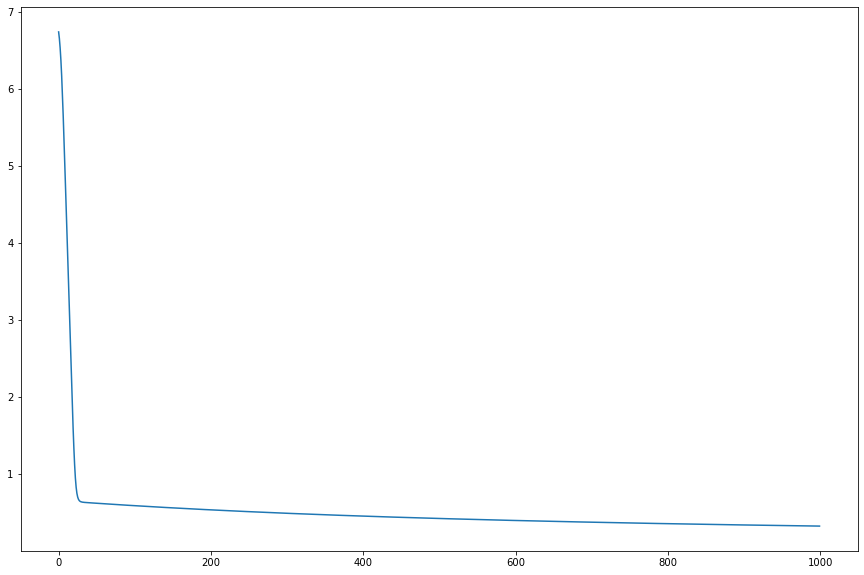

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(r[1])
plt.show()


Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод. 

 Время выполнения примерно одинаковое, кол-во ошибок ( в качестве метрики ) тоже одинаковое..